## KMeans

### Tạo data

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X1 = np.random.normal(70, 10, 50)
Y1 = np.random.normal(70, 10, 50)

X2 = np.random.normal(40, 10, 50)
Y2 = np.random.normal(40, 10, 50)

X3 = np.random.normal(10, 10, 50)
Y3 = np.random.normal(80, 10, 50)

# X4 = np.random.normal(20, 1, 50)
# Y4 = np.random.normal(55, 1, 50)

X = np.concatenate((X1, X2))
Y = np.concatenate((Y1, Y2))

X_bar = np.vstack((X, Y))
X_bar.shape

(2, 100)

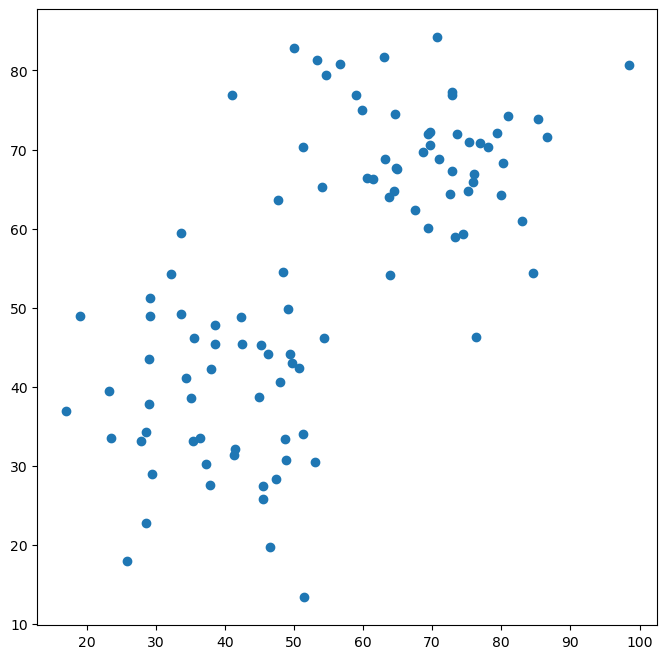

In [134]:
plt.figure(figsize=(8, 8))
plt.scatter(X_bar[0], X_bar[1])

### Khởi tạo tâm cụm ban đầu ngẫu nhiên

In [135]:
k = 2
c = np.array([0 for i in range(X_bar.shape[1])])
c.shape

(100,)

In [142]:
centroids = np.array([[np.random.randint(1,100), np.random.randint(1,100)] for i in range(k)])
centroids

array([[89, 71],
       [39, 76]])

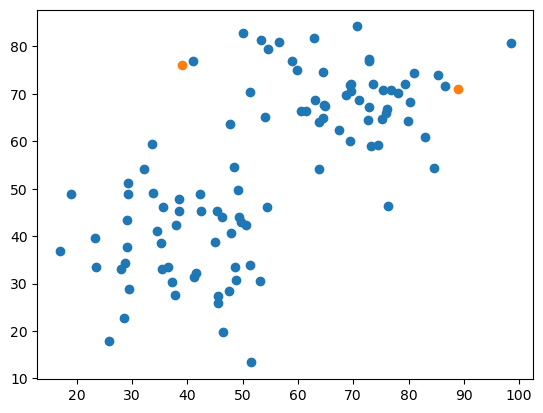

In [143]:
plt.scatter(X_bar[0], X_bar[1])
plt.scatter(centroids.T[0],centroids.T[1])

In [148]:
# for i in enumerate(c):
distances_0 = np.linalg.norm(X_bar.T - centroids[0], axis=1)
distances_1 = np.linalg.norm(X_bar.T - centroids[1], axis=1)
# distances_2 = np.linalg.norm(X_bar.T - centroids[2], axis=1)

distances = np.vstack((distances_0, distances_1))
index = np.argmin(distances, axis=0)
c = index
c

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [156]:
X_bar.shape

(2, 100)

In [163]:
X_bar.T[np.where(c == 0), :][0].shape

(49, 2)

In [213]:
print(np.concatenate(np.ravel([np.linalg.norm(X_bar.T[np.where(c == i), :][0] - centroids[i], axis=1) for i in range(k)])))

[ 6.74207462 20.64417055 11.04995571  7.77447293 23.58212781  2.97323443
 14.56652657  6.83448718  3.38448931  3.17675191  5.62684146 13.55498261
  4.6459784  15.3108612  16.11235079  1.61647989  5.28014987  8.16922806
  5.36029474  8.34879097  8.91532279  9.82142429 24.24525581  1.01733547
 16.39993806 20.74248742 10.56491267 16.03886808  7.15181444 15.20862273
  6.90198049 10.24387323 18.80153469  6.68912061  5.45128156  8.76191311
 16.87183752 10.65367331 11.8111324   6.40177041  9.89712519  7.06436815
 12.2344868  17.90006584 18.54593431  1.50557882  8.04555681  9.04266103
 30.82401055 37.96176064 15.19337571  6.41714467 11.68194588  2.87095975
 28.97587387  5.72392153 14.77040138  9.61625743 10.03849075  7.01451188
 10.71622601 13.09563968 13.75562608 21.10089081  9.69023283  8.25136359
 20.8798879   6.36319692  4.14688882 10.45596827 14.19468882 12.05392953
 24.37135787  3.29174399  9.03204916  8.80476274 13.26640141 26.46197366
 15.02685154  8.76785675 18.67494129 18.74058728 12

In [200]:
# distances_c0_x = np.linalg.norm(X_bar.T[np.where(c == 0), :][0] - centroids[0], axis=1)
# distances_c1_x = np.linalg.norm(X_bar.T[np.where(c == 1), :][0] - centroids[1], axis=1)
# distances_ci_x = np.concatenate((distances_c0_x, distances_c1_x))
distances_ci_x = np.concatenate( np.ravel(
    [np.linalg.norm(X_bar.T[np.where(c == i), :][0] - centroids[i], axis=1) for i in range(k)]
                                        ))
np.mean(distances_ci_x)

12.204426348533406

In [209]:
distances_ci_x

array([ 6.74207462, 20.64417055, 11.04995571,  7.77447293, 23.58212781,
        2.97323443, 14.56652657,  6.83448718,  3.38448931,  3.17675191,
        5.62684146, 13.55498261,  4.6459784 , 15.3108612 , 16.11235079,
        1.61647989,  5.28014987,  8.16922806,  5.36029474,  8.34879097,
        8.91532279,  9.82142429, 24.24525581,  1.01733547, 16.39993806,
       20.74248742, 10.56491267, 16.03886808,  7.15181444, 15.20862273,
        6.90198049, 10.24387323, 18.80153469,  6.68912061,  5.45128156,
        8.76191311, 16.87183752, 10.65367331, 11.8111324 ,  6.40177041,
        9.89712519,  7.06436815, 12.2344868 , 17.90006584, 18.54593431,
        1.50557882,  8.04555681,  9.04266103, 30.82401055, 37.96176064,
       15.19337571,  6.41714467, 11.68194588,  2.87095975, 28.97587387,
        5.72392153, 14.77040138,  9.61625743, 10.03849075,  7.01451188,
       10.71622601, 13.09563968, 13.75562608, 21.10089081,  9.69023283,
        8.25136359, 20.8798879 ,  6.36319692,  4.14688882, 10.45

In [154]:
distances_0.shape

(100,)

In [149]:
np.mean(distances)

27.5433584344899

### Gán lại tâm cụm

In [150]:
for i, centroid in enumerate(centroids):
    centroids[i] = np.mean(X_bar[:,c == i], axis=1)

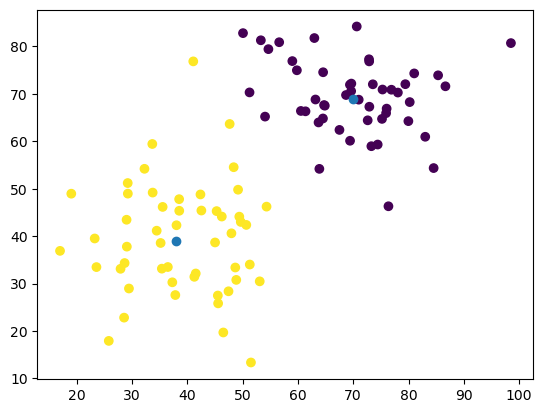

In [151]:
plt.scatter(X_bar[0], X_bar[1], c=c)
plt.scatter(centroids.T[0],centroids.T[1])

## myKmeans()

In [15]:
def myKmeans(X_bar, k):
    J_history = []
    Label_history = []
    C_history = []
    for seed in range(1000):
        c = np.array([0 for i in range(X_bar.shape[1])])
        centroids = np.array([[np.random.randint(1,100) for x in range(X_bar.shape[0])] for i in range(k)])
        cost = 0

        for i in range(1000):
            distances = [np.linalg.norm(X_bar.T - centroid, axis=1) for centroid in centroids]
            
            if k == 1:
                J_history.append(np.mean(distances))
                Label_history.append(c)
                C_history.append(centroids)
                break

            index = np.argmin(distances, axis=0)
            
            if len(set(index)) == k:
                c = index
            else: 
                break
            
            distances_ci_x = np.array([])
            for j in range(k):
                distances_ci_x_j = np.linalg.norm(X_bar.T[np.where(c == j), :][0] - centroids[j], axis=1)
                distances_ci_x = np.concatenate((distances_ci_x, distances_ci_x_j), axis=0)
            # print(distances_ci_x_j.shape)

            for i, centroid in enumerate(centroids):
                centroids[i] = np.mean(X_bar[:,c == i], axis=1)

            if (i != 0) and (abs(cost - np.mean(distances_ci_x)) < 0.005):
                # print(f"Seed at {seed}, Stop at i = {i} and cost = {cost}")
                J_history.append(cost)
                Label_history.append(c)
                C_history.append(centroids)
                break
            else:
                cost = np.mean(distances_ci_x)
                # print(f"Seed at {seed}, Cost at i = {i} is {cost}")
    
    cost = min(J_history)
    index = np.argmin(J_history)
    c = Label_history[index]
    centroids = C_history[index]
    return cost, index, c, centroids


Cost = 11.359344064679632, 
Index=568,
Centroid: 
 [[41.41732853 36.68722806]
 [71.93057314 70.53721182]
 [44.78083679 56.35811588]]


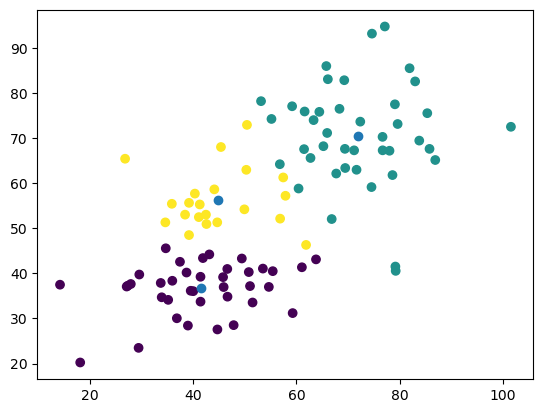

In [290]:
cost, index, c, centroids = myKmeans(X_bar, 3)
print(f"\nCost = {cost}, \nIndex={index},\nCentroid: \n {centroids}")
plt.clf()
plt.scatter(X_bar[0], X_bar[1], c=c)
plt.scatter(centroids.T[0],centroids.T[1])
plt.show()

### Enboil

In [248]:
K = range(1, 10)
COST = []
for i in K:
    cost, _, _, _ = myKmeans(X_bar, i)
    print(i, cost)
    COST.append(cost)


1 22.654588954058273
2 13.07099074245749
3 11.352225569911655
4 10.012234355114021
5 8.76108194857788
6 8.075856914933546
7 7.463723539826878
8 6.969495235309264
9 6.577325986880071


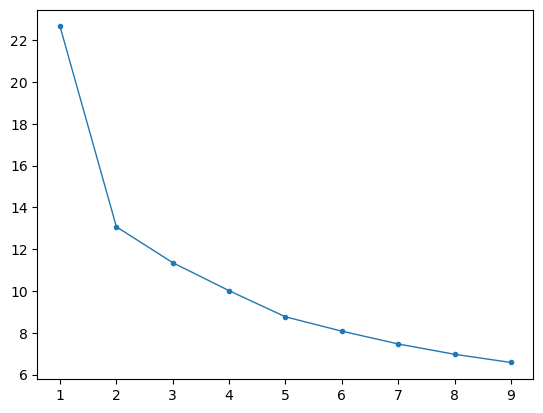

In [259]:
plt.plot(K, COST,'-o', linewidth=1, markersize = 3)

### Sklearn

In [267]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X_bar.T)
model.cluster_centers_

array([[38.9848971 , 36.70306088],
       [72.40915214, 73.19208513],
       [51.45547172, 53.45305479]])

## KMeans with data idx

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import idx2numpy

In [3]:
X_train_dir = './data/train-images.idx3-ubyte'
y_train_dir = './data/train-labels.idx1-ubyte'
X_val_dir = './data/t10k-images.idx3-ubyte'
y_val_dir = './data/t10k-labels.idx1-ubyte'

X_train = idx2numpy.convert_from_file(X_train_dir).reshape(60000, -1)
y_train = idx2numpy.convert_from_file(y_train_dir)
X_val = idx2numpy.convert_from_file(X_val_dir).reshape(10000, -1)
y_val = idx2numpy.convert_from_file(y_val_dir)


print("X-train shape:", X_train.shape)
print("y-train shape:", y_train.shape)
print("X-val shape:", X_val.shape)
print("y-val shape:", y_val.shape)

X-train shape: (60000, 784)
y-train shape: (60000,)
X-val shape: (10000, 784)
y-val shape: (10000,)


In [4]:
def myKmeans(X_bar, k):
    J_history = []
    Label_history = []
    C_history = []
    for seed in range(1000):
        c = np.array([0 for i in range(X_bar.shape[1])])
        centroids = np.array([X_bar.T[np.random.randint(1,X_bar.shape[1])] for i in range(k)])
        cost = 0

        for i in range(1000):
            distances = [np.linalg.norm(X_bar.T - centroid, axis=1) for centroid in centroids]
            
            if k == 1:
                J_history.append(np.mean(distances))
                Label_history.append(c)
                C_history.append(centroids)
                break

            index = np.argmin(distances, axis=0)
            
            if len(set(index)) == k:
                c = index
            else: 
                break
            
            distances_ci_x = np.array([])
            for j in range(k):
                distances_ci_x_j = np.linalg.norm(X_bar.T[np.where(c == j), :][0] - centroids[j], axis=1)
                distances_ci_x = np.concatenate((distances_ci_x, distances_ci_x_j), axis=0)


            for i, centroid in enumerate(centroids):
                centroids[i] = np.mean(X_bar[:,c == i], axis=1)

            cost = np.mean(distances_ci_x)
            J_history.append(cost)
            Label_history.append(c)
            C_history.append(centroids)
            
            # if (i != 0) and (abs(cost - np.mean(distances_ci_x)) < 0.5):
            #     print(f"Seed at {seed}, Stop at i = {i} and cost = {cost}")
            #     J_history.append(cost)
            #     Label_history.append(c)
            #     C_history.append(centroids)
            #     break
            # else:
            #     cost = np.mean(distances_ci_x)
    
    cost = min(J_history)
    index = np.argmin(J_history)
    c = Label_history[index]
    centroids = C_history[index]
    return cost, index, c, centroids

In [7]:
cost, index, c, centroids = myKmeans(X_train[:100].T, 9)
print(f"\nCost = {cost}, \nIndex={index},\nCentroid: \n {centroids}")


Cost = 1775.92609226272, 
Index=483,
Centroid: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
centroids.shape

(9, 784)

In [9]:
def visual_cluster_data(label=0):
    X_labeled = X_train[np.where(c==label),:][0]
    fig, axs = plt.subplots(1, min(X_labeled.shape[0] + 1, 6))
    axs[0].imshow(centroids[label].reshape(28, 28))
    for i,x in enumerate(X_labeled):
        if i > 4:
            break
        axs[i+1].imshow(x.reshape(28, 28))
        axs[i+1].set_xticklabels([])
        axs[i+1].set_yticklabels([])
    
    plt.show()

Hiển thị kết quả trực quan

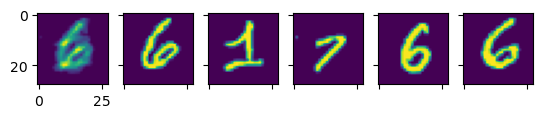

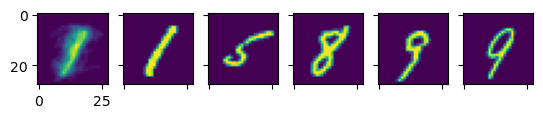

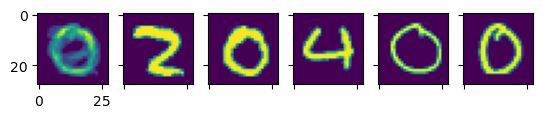

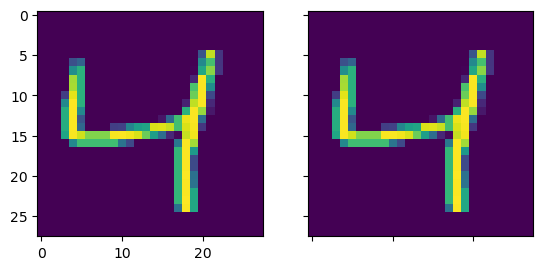

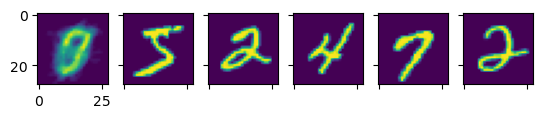

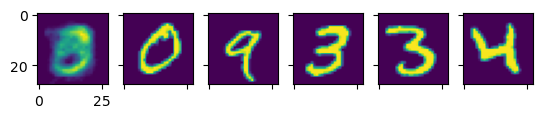

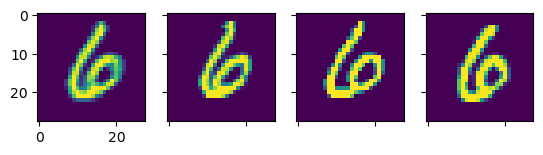

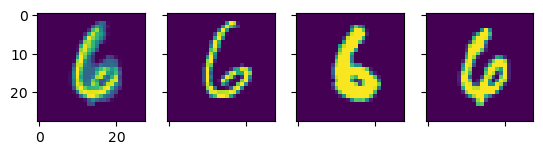

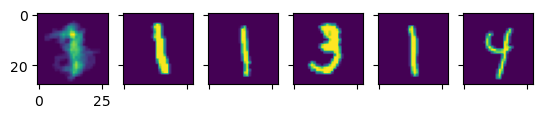

In [10]:
for i in range(9):
    visual_cluster_data(i)

Giảm chiều dữ liệu, sau đó phân cụm và trực quan

In [5]:
def myPCA(X, k = 3):
    X = X.T
    N  = X.shape[1]
    X_bar = X.mean(axis=1).reshape(-1, 1)
    X_hat = X - X_bar
    S = (X_hat @ X_hat.T) / N
    SVD = np.linalg.svd(S)
    U = SVD[0]
    lambd = SVD[1]
    Z = U[:, :k].T @ X_hat
    z = Z.T
    return z

In [38]:
THRESHOLD = 1000
X = X_train[:THRESHOLD]
z = myPCA(X, k = 3)
pc1 = z[:, 0]
pc2 = z[:, 1]
pc3 = z[:, 2]

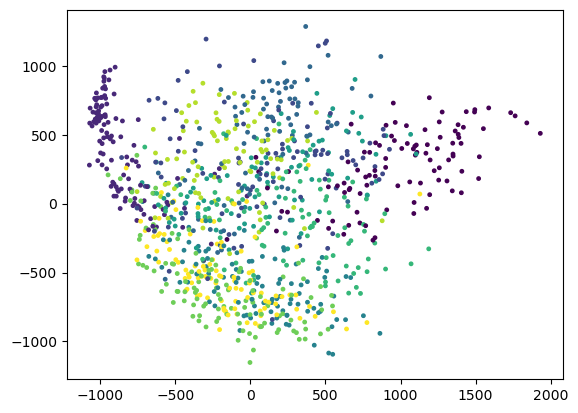

In [39]:
plt.scatter(pc1, pc2, c = y_train[:THRESHOLD], s=6)

In [41]:
X = np.array((pc1, pc2, pc3)).T
X.shape

(1000, 3)

In [42]:
cost, index, c, centroids = myKmeans(X[:1000].T, 9)
print(f"\nCost = {cost}, \nIndex={index},\nCentroid: \n {centroids}")


Cost = 399.6445051838853, 
Index=140,
Centroid: 
 [[ 319 -675 -281]
 [-588  -14  303]
 [  21  484 -231]
 [1191  379  -55]
 [ 466  217 -730]
 [ 392  372  711]
 [ -13 -564  343]
 [-320 -281 -362]
 [-890  596 -107]]


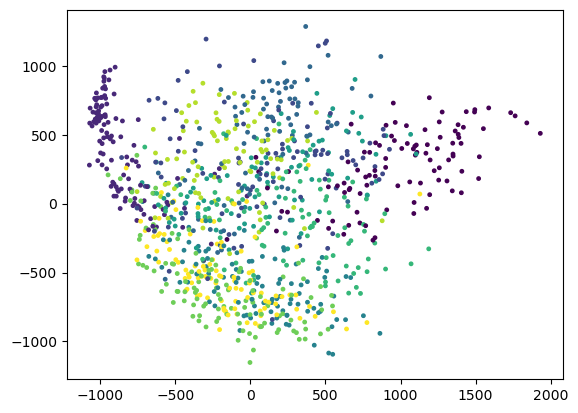

In [62]:
plt.scatter(pc1, pc2, c = y_train[:1000], s=6)
# plt.scatter(centroids.T[0],centroids.T[1], edgecolors='red', cmap='ro')

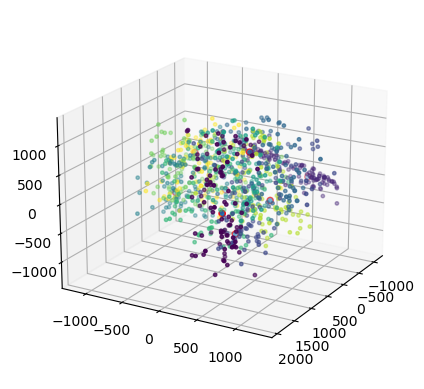

In [60]:
ax = plt.axes(projection = "3d")
ax.scatter3D(pc1, pc2, pc3, c = y_train[:THRESHOLD], s = 6)
ax.scatter3D(centroids.T[0],centroids.T[1], centroids.T[2], edgecolors='red')
ax.view_init(elev=20., azim=30)

In [61]:
from ipywidgets import interact

def plot_3d(elev=20, azim=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(pc1, pc2, pc3, c = y_train[:THRESHOLD], s = 6)
    # ax.scatter3D(centroids.T[0],centroids.T[1], centroids.T[2], edgecolors='red')
    ax.view_init(elev=elev, azim=azim)
    plt.show()

interact(plot_3d, elev=(-90, 90), azim=(-180, 180))

interactive(children=(IntSlider(value=20, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

<function __main__.plot_3d(elev=20, azim=30)>